In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
size_functions = 128
not_sgd = False
if not_sgd:
  alpha = 0.05
  nb_epoch = 10000
else:
  alpha = 1
  nb_epoch = 100000

In [ ]:
def generate_functions(size=128):
  df=[]
  for k in range(size+1):
    function_k = np.ones((size))
    for i in range(k):
      function_k[i] = 0
    df.append(function_k)
  return np.array(df)

In [ ]:
def visualization_step_function(step_function):
  plt.plot(step_function)

def full_visualization(X, X_bis=np.empty(0), w=10):
  fig, axs = plt.subplots(math.ceil(X.shape[0]/w), w,figsize=(w*2,math.ceil(X.shape[0]/w)*2.2))
  for k in range (X.shape[0]):
    axs[k//w, k%w].plot(X[k])
    #axs[k//w, k%w].plot(X[k], marker='.', linestyle=None)
    if not X_bis.size == 0:
      axs[k//w, k%w].plot(X_bis[k])
      #axs[k//w, k%w].plot(X_bis[k], marker='.', linestyle=None)
    axs[k//w, k%w].set_title(str(k), y=0.99)


In [ ]:
X_np = generate_functions(size_functions)
X = torch.from_numpy(X_np).float()
print(X.shape)
print(X)
#visualization_step_function(X[64])
X_partial = torch.from_numpy(np.concatenate((X_np[:60],X_np[70:]))).float()
print(X_partial.shape)
print(X_partial)

torch.Size([129, 128])
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [0., 1., 1.,  ..., 1., 1., 1.],
        [0., 0., 1.,  ..., 1., 1., 1.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
torch.Size([119, 128])
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [0., 1., 1.,  ..., 1., 1., 1.],
        [0., 0., 1.,  ..., 1., 1., 1.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [ ]:
#full_visualization(X_np)

In [ ]:

class Autoencoder(nn.Module):
    def __init__(self,size_functions):
        super(Autoencoder, self).__init__()
        self.fc1 = nn.Linear(size_functions,1) # encoder
        self.fc2 = nn.Linear(1,size_functions) # decoder
    def forward(self,X):
        A0 = X
        A1 = F.leaky_relu(self.fc1(X))  
        A2 = F.sigmoid(self.fc2(A1))
        return A2

def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

class Encoder(nn.Module):
    def __init__(self,size_functions):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(size_functions,1) # encoder
    def forward(self,X):
        A0 = X
        A1 = F.leaky_relu(self.fc1(X))  
        return A1

class Decoder(nn.Module):
    def __init__(self,size_functions):
        super(Decoder, self).__init__()
        self.fc2 = nn.Linear(1,size_functions) # decoder
    def forward(self,X):
        A0 = X
        A2 = F.sigmoid(self.fc2(A0))
        return A2

class Autoencoder_splitted(nn.Module):
    def __init__(self,size_functions):
        super(Autoencoder_splitted, self).__init__()
        self.encoder = Encoder(size_functions)
        self.decoder = Decoder(size_functions)

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)

In [ ]:
model = Autoencoder_splitted(size_functions)

In [ ]:
criterion = nn.MSELoss()

if not_sgd:
  optimizer = torch.optim.Adam(model.parameters(), lr=alpha)
else:
  optimizer = torch.optim.SGD(model.parameters(), lr=alpha)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch 0, loss 0.2656787931919098
epoch 10000, loss 0.07987339794635773
epoch 20000, loss 0.038170330226421356
epoch 30000, loss 0.028266901150345802
epoch 40000, loss 0.0237076748162508
epoch 50000, loss 0.02097821608185768
epoch 60000, loss 0.019059743732213974
epoch 70000, loss 0.017611410468816757
epoch 80000, loss 0.016541341319680214
epoch 90000, loss 0.015594536438584328


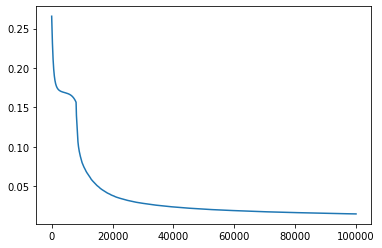

In [ ]:
loss_l = []
for num_epoch in range(nb_epoch):
  X_predicted = model(X) #Pass through autoencoder
  loss = criterion(X_predicted, X) # Compute loss 
  # Zero gradients, perform a backward pass, and update the weights. 
  optimizer.zero_grad() # re-init the gradients (otherwise they are cumulated)
  loss.backward() # perform back-propagation
  optimizer.step() # update the weights
  loss_l.append(loss)
  if num_epoch % 10000 == 0:
      print('epoch {}, loss {}'.format(num_epoch, loss.item()))
plt.plot(loss_l)


In [ ]:
model_partial = Autoencoder_splitted(size_functions)


if not_sgd:
  optimizer_partial = torch.optim.Adam(model_partial.parameters(), lr=alpha)
else:
  optimizer_partial = torch.optim.SGD(model_partial.parameters(), lr=alpha)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Partial : epoch 0, loss 0.26607006788253784
Partial : epoch 10000, loss 0.04659050703048706
Partial : epoch 20000, loss 0.03121008723974228
Partial : epoch 30000, loss 0.02410980314016342
Partial : epoch 40000, loss 0.02073322981595993
Partial : epoch 50000, loss 0.01864936202764511
Partial : epoch 60000, loss 0.01706642657518387
Partial : epoch 70000, loss 0.015922896564006805
Partial : epoch 80000, loss 0.014940907247364521
Partial : epoch 90000, loss 0.014185640960931778


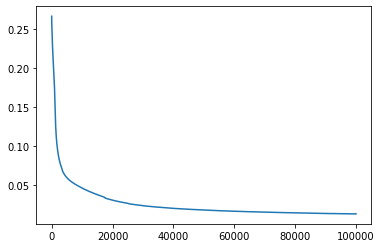

In [ ]:
loss_partial = []
for num_epoch in range(nb_epoch):
  X_predicted_partial = model_partial(X_partial) #Pass through autoencoder
  loss_2 = criterion(X_predicted_partial, X_partial) # Compute loss 
  # Zero gradients, perform a backward pass, and update the weights. 
  optimizer_partial.zero_grad() # re-init the gradients (otherwise they are cumulated)
  loss_2.backward() # perform back-propagation
  optimizer_partial.step() # update the weights
  loss_partial.append(loss_2)
  if num_epoch % 10000 == 0:
      print('Partial : epoch {}, loss {}'.format(num_epoch, loss_2.item()))

plt.plot(loss_partial)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


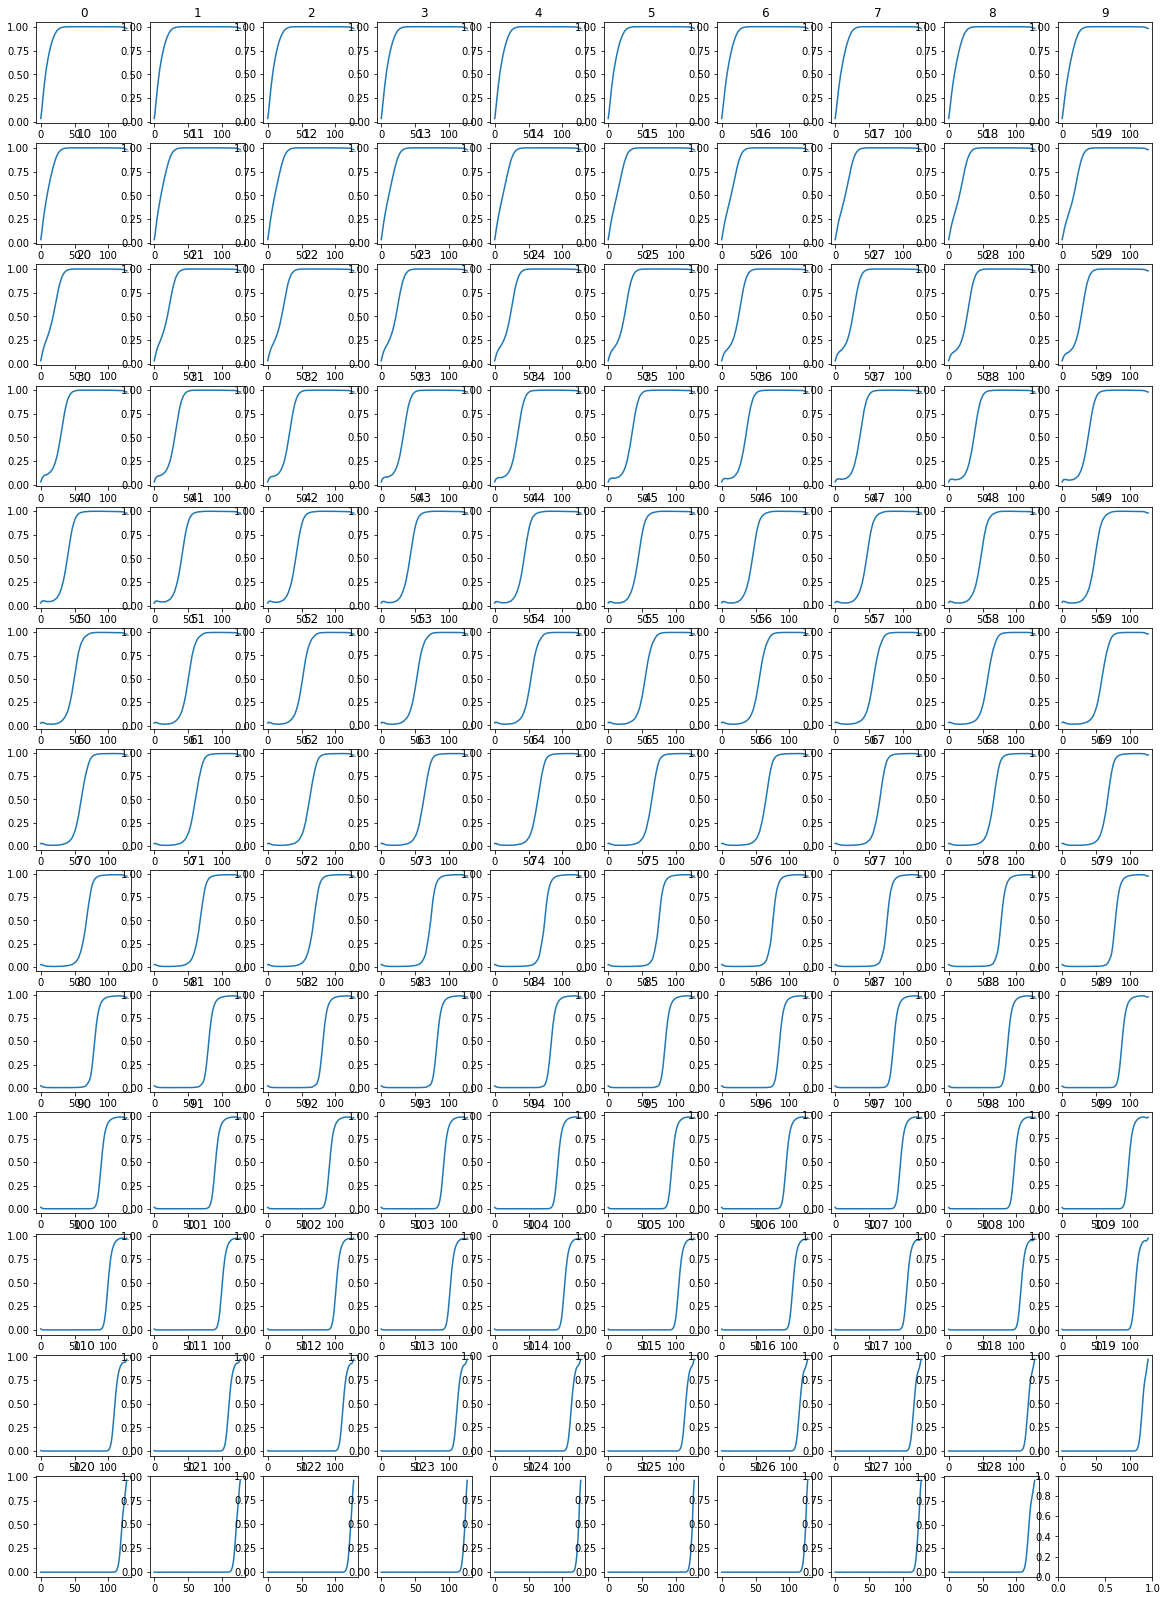

In [ ]:
activation = {}

X_predicted = model(X).detach().numpy()
activation_full = model.encoder(X).detach().numpy()
#Print
full_visualization(X_predicted)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


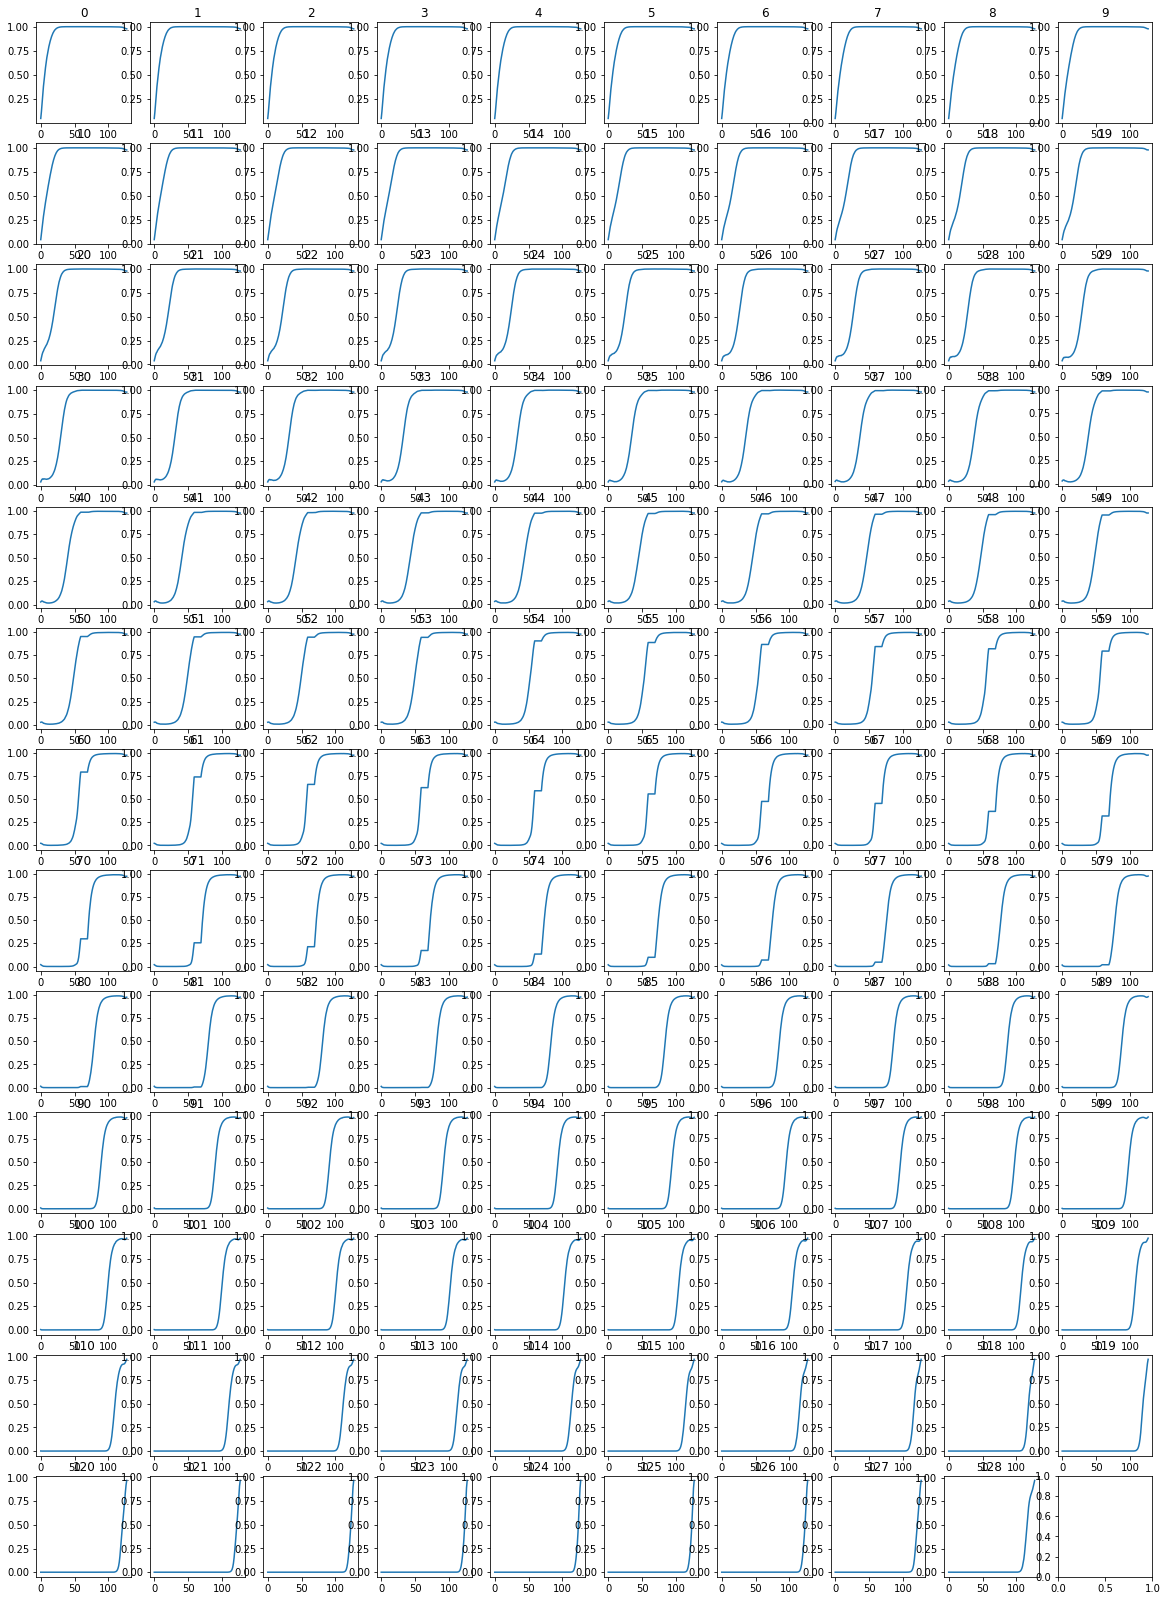

In [ ]:
#Partial :
X_predicted_partial = model_partial(X).detach().numpy()
activation_partial = model_partial.encoder(X).detach().numpy()
#print(X_predicted_partial[0])

full_visualization(X_predicted_partial)

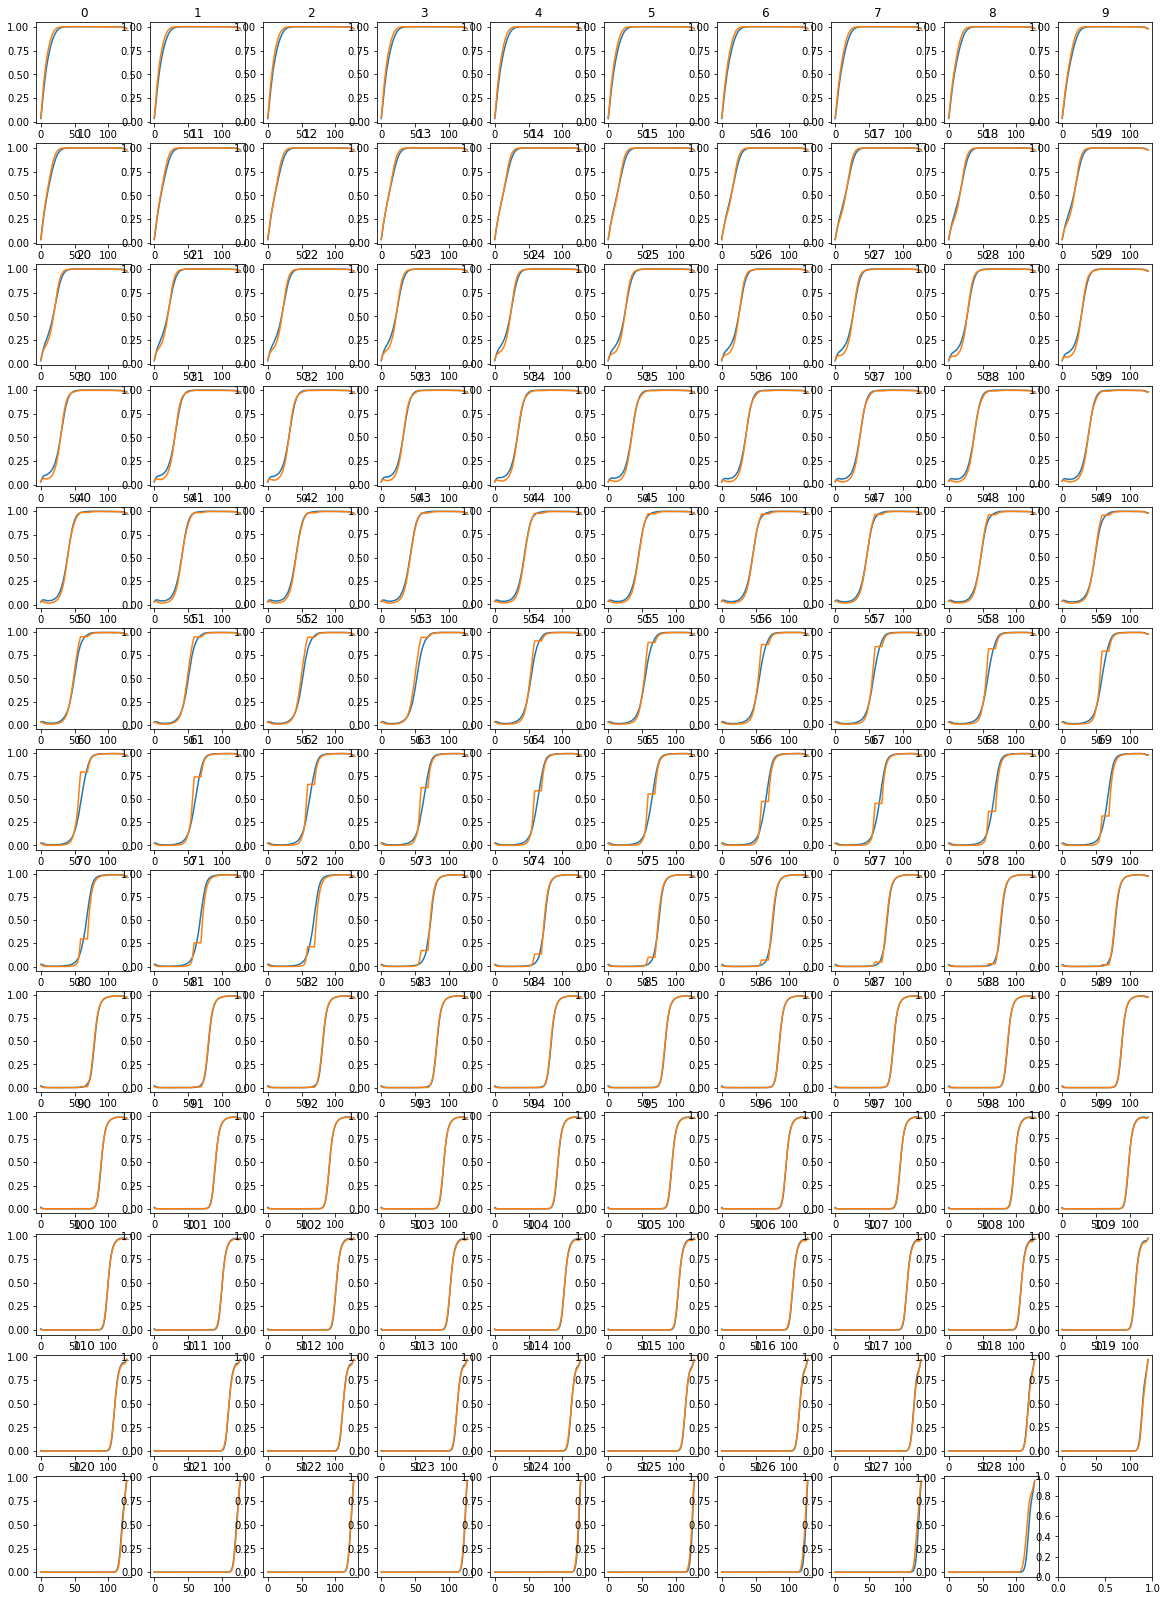

In [ ]:
full_visualization(X_predicted, X_predicted_partial)

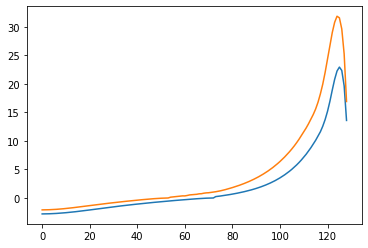

In [ ]:
#print(activation['fc1'].detach().numpy())
#plt.plot(activation['fc1'].detach().numpy())

plt.plot(activation_full)
plt.plot(activation_partial)


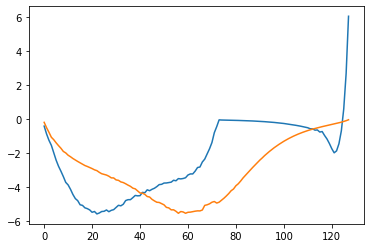

In [ ]:
plt.plot(model.encoder.fc1.weight.detach().numpy()[0])
plt.plot(model.decoder.fc2.weight.detach().numpy())
plt.show()


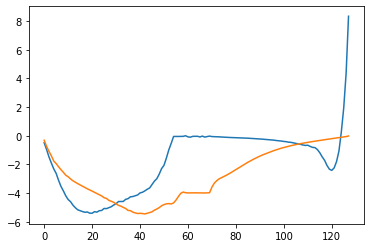

In [ ]:
plt.plot(model_partial.encoder.fc1.weight.detach().numpy()[0])
plt.plot(model_partial.decoder.fc2.weight.detach().numpy())
plt.show()


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


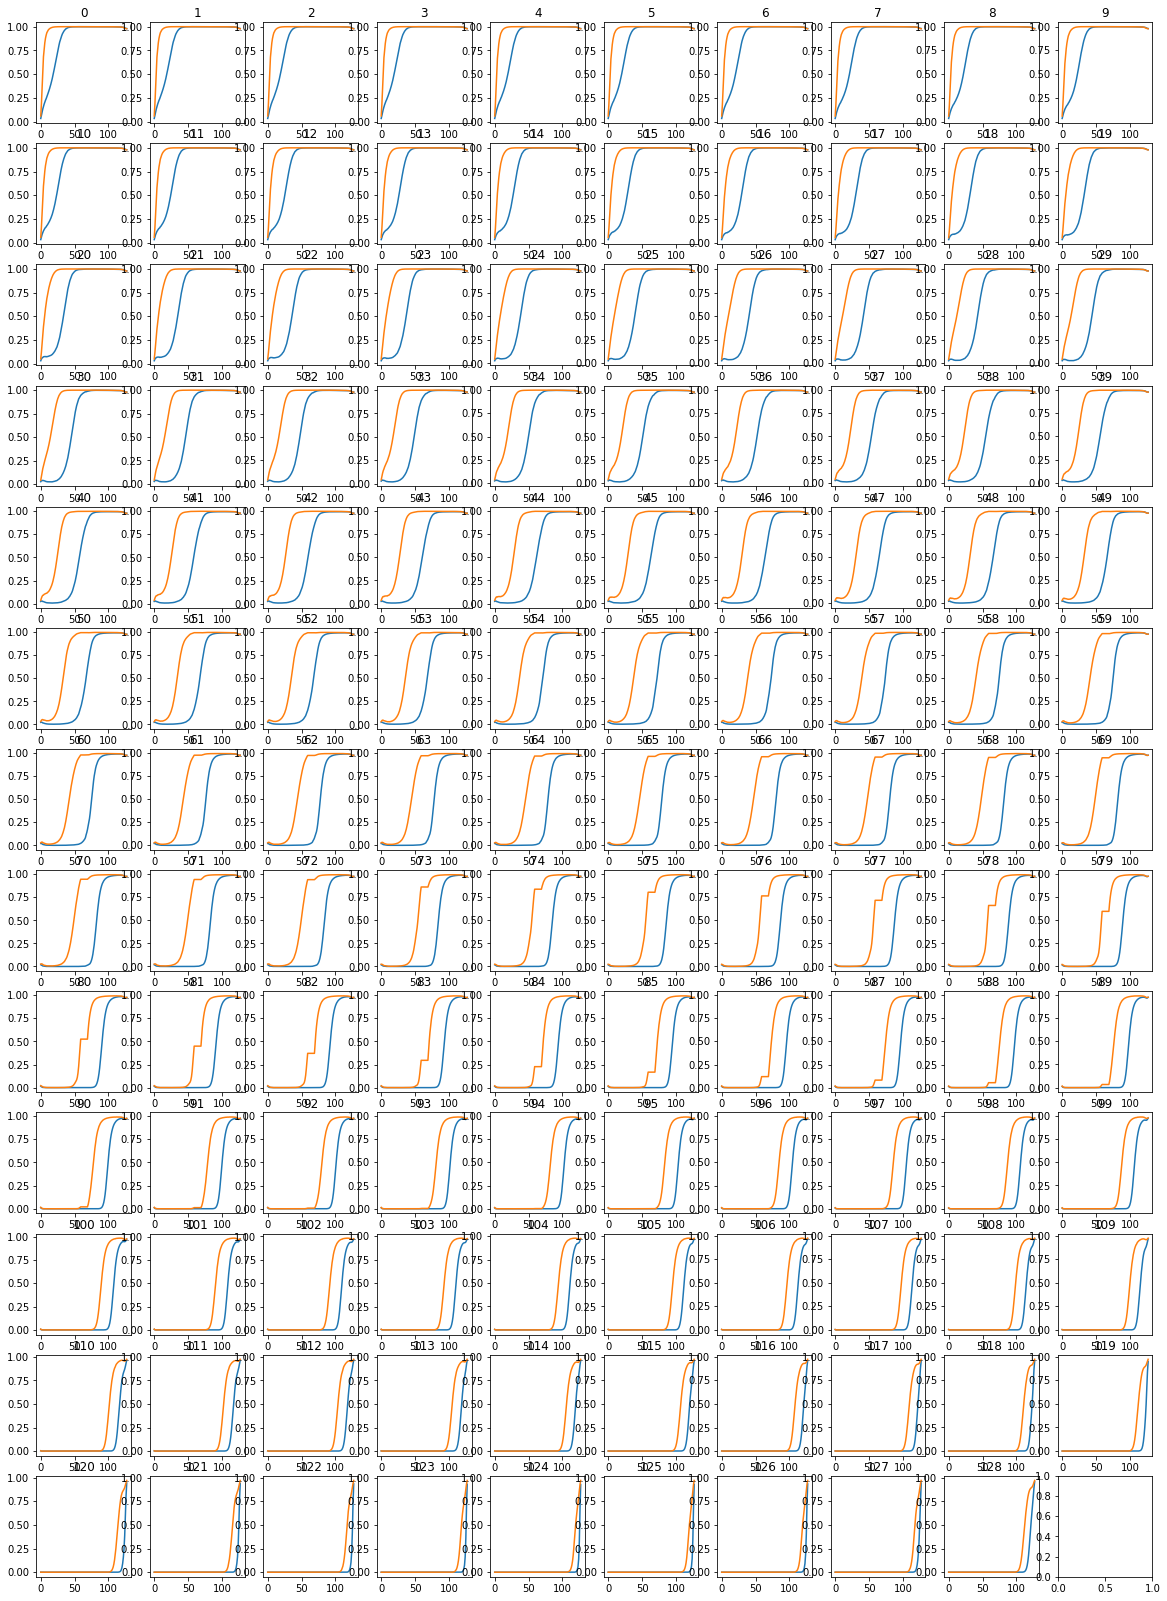

In [ ]:
X_predicted_Epart_Dfull = model.decoder(torch.tensor(activation_partial)).detach().numpy()
X_predicted_Efull_Dpart = model_partial.decoder(torch.tensor(activation_full)).detach().numpy()
full_visualization(X_predicted_Epart_Dfull,X_predicted_Efull_Dpart)

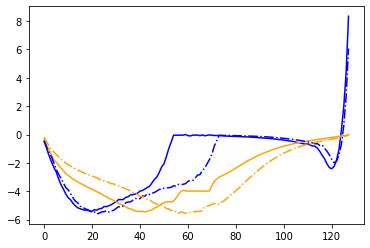

In [ ]:
plt.plot(model_partial.encoder.fc1.weight.detach().numpy()[0], color='blue')
plt.plot(model_partial.decoder.fc2.weight.detach().numpy(), color='orange')

plt.plot(model.encoder.fc1.weight.detach().numpy()[0], linestyle='-.', color='blue')
plt.plot(model.decoder.fc2.weight.detach().numpy(), linestyle='-.', color='orange')

plt.show()